In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('acc_20.csv')

# Display the first few rows
print(df.head())
print("Available columns:\n", df.columns)

# Check for missing values
print("Missing values:\n", df.isnull().sum())


        CASENUM  STRATUM                              STRATUMNAME  REGION  \
0  202002121240        9  Stratum 9 - LMY PV No Injuries in Crash       4   
1  202002121829        8         Stratum 8 - NLMY PV Minor Injury       3   
2  202002121849        9  Stratum 9 - LMY PV No Injuries in Crash       3   
3  202002123484       10                       Stratum 10 - Other       4   
4  202002123576       10                       Stratum 10 - Other       1   

                                          REGIONNAME  PSU    PJ  PSU_VAR  \
0  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
1  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   28  4139       28   
2  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142       12   
3  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140       20   
4     Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)   22  4149       22   

   URBANICITY URBANICITYNAME  ...  WEATHR_IM  WEATHR_IMNAME  MAXSEV_IM  \
0     

In [46]:
# Use available columns for weather and road/light conditions
df['weather'] = df['WEATHERNAME']
df['road_condition'] = df['LGT_CONDNAME']  # Light condition might be closest to road condition

# Drop rows with missing relevant values
df.dropna(subset=['weather', 'road_condition'], inplace=True)

In [47]:
# Create a fake date column using existing time-related features
df['datetime'] = pd.to_datetime(dict(year=df['YEAR'], month=df['MONTH'], day=1, hour=df['HOUR'], minute=df['MINUTE']))
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

<ipython-input-48-d18706cc3e4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='road_condition', order=df['road_condition'].value_counts().index, palette='viridis')


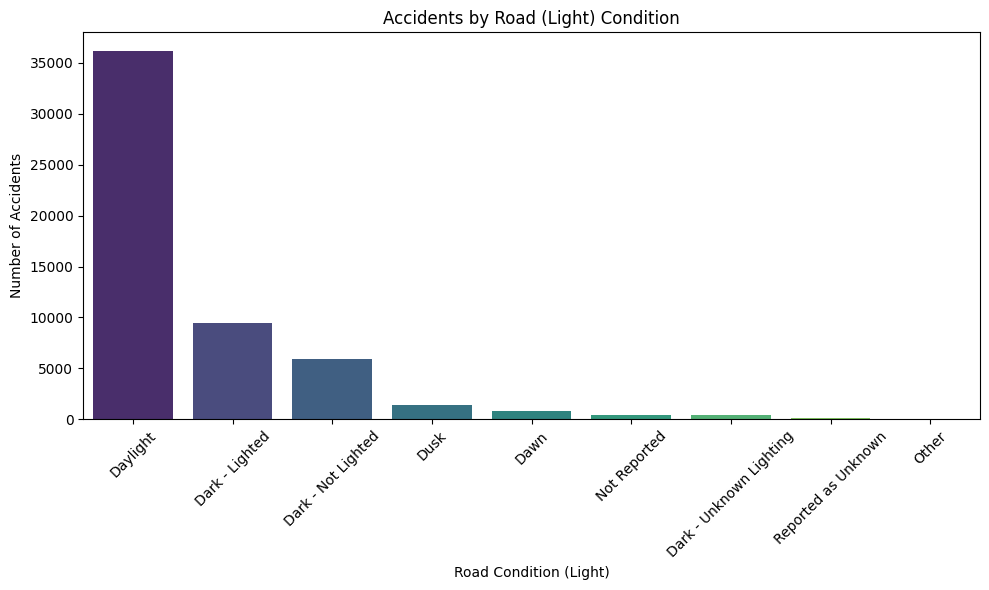

In [48]:
# Plot - Accidents by Road Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='road_condition', order=df['road_condition'].value_counts().index, palette='viridis')
plt.title('Accidents by Road (Light) Condition')
plt.xlabel('Road Condition (Light)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-49-26ba3fd5b403>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette='viridis')


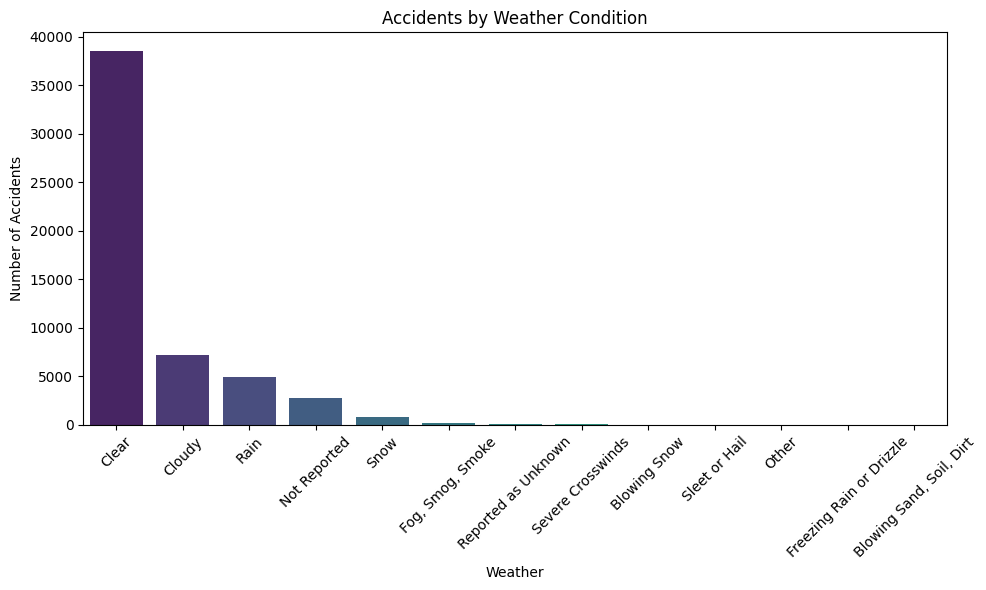

In [49]:
# Plot - Accidents by Weather Condition
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather', order=df['weather'].value_counts().index, palette='viridis')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()